# Part 1 Music Comparison

# Contemparory Muisic 

In [1]:
import librosa
audio_path = 'ChuckBrown_AmberWaves.mp3'
x , sr = librosa.load(audio_path)
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [2]:
print(x.shape, sr)

(4146624,) 22050


In [3]:
librosa.load(audio_path, sr=44100)

(array([ 0.,  0.,  0., ...,  0.,  0.,  0.], dtype=float32), 44100)

In [4]:
import IPython.display as ipd
ipd.Audio(audio_path)

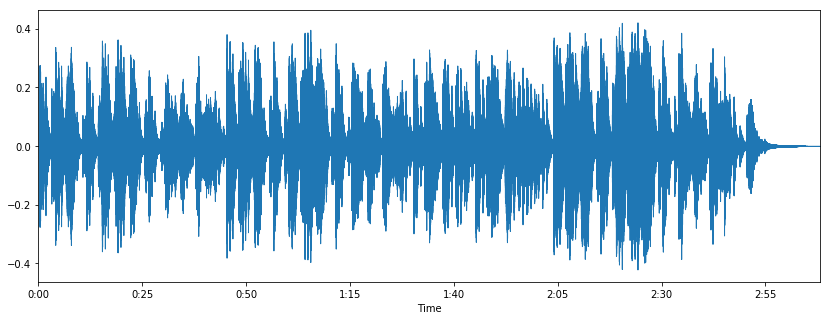

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

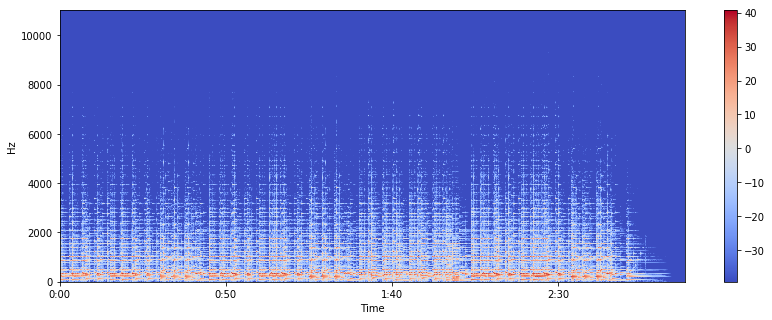

In [8]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

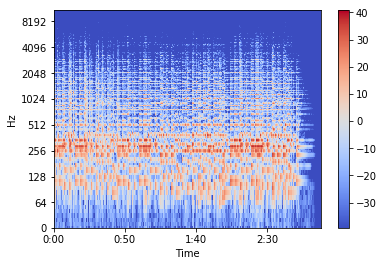

In [9]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

# Chopin Music

In [21]:
audio_path2 = 'Ballade1.mp3'
chopin , sr2 = librosa.load(audio_path2)

In [22]:
librosa.load(audio_path2, sr=44100)

(array([ 0.,  0.,  0., ...,  0.,  0.,  0.], dtype=float32), 44100)

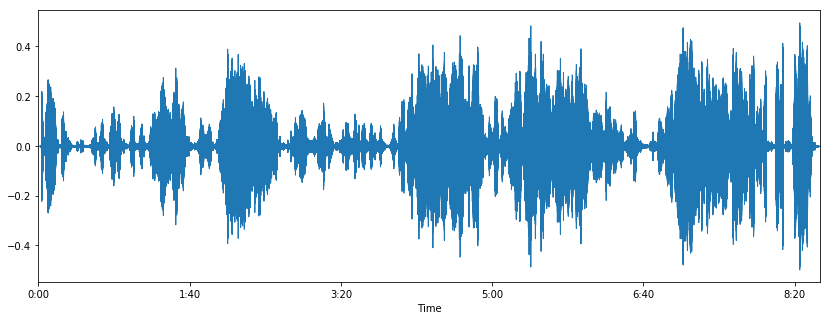

In [12]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(chopin, sr=sr2)

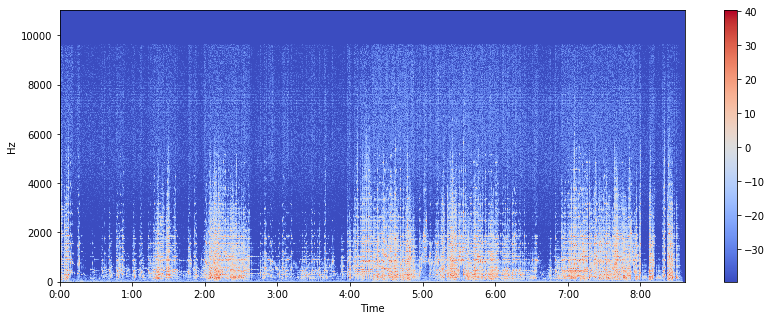

In [14]:
Y = librosa.stft(chopin)
Xdb2 = librosa.amplitude_to_db(abs(Y))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb2, sr=sr2, x_axis='time', y_axis='hz')
plt.colorbar()

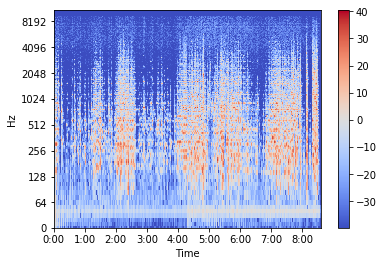

In [15]:
librosa.display.specshow(Xdb2, sr=sr2, x_axis='time', y_axis='log')
plt.colorbar()

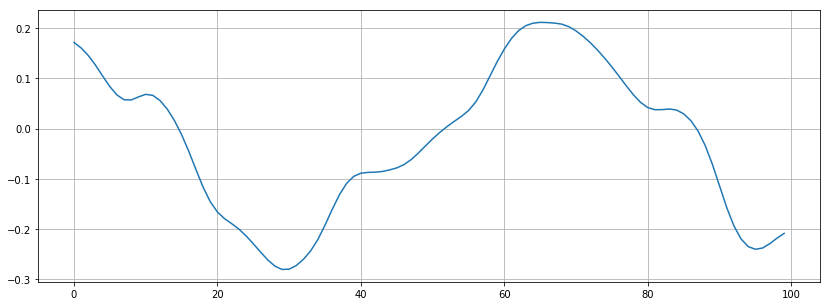

In [17]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

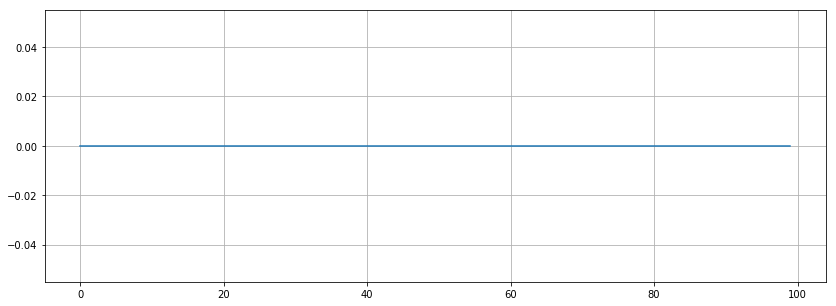

In [23]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(chopin[n0:n1])
plt.grid()

In [19]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

3


In [20]:
zero_crossings = librosa.zero_crossings(chopin[n0:n1], pad=False)
print(sum(zero_crossings))

0


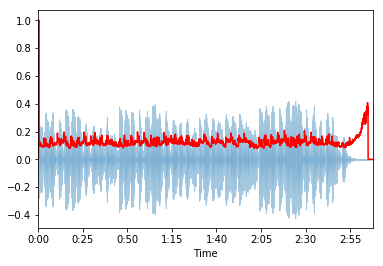

In [25]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

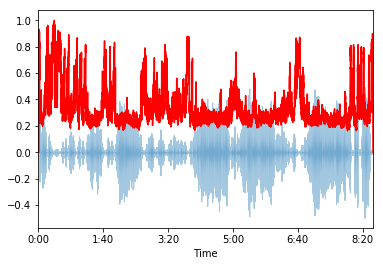

In [26]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(chopin, sr=sr2)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(chopin, sr=sr2, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

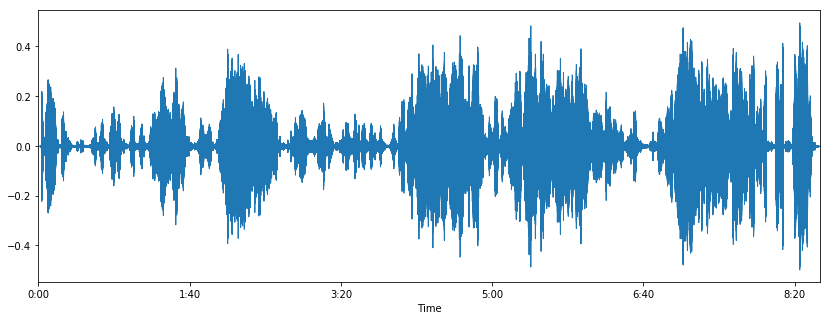

In [27]:
audio_path3 = 'Ballade1.mp3'
chopin2 , sr3 = librosa.load(audio_path3)
plt.figure(figsize=(14, 5))
librosa.display.waveplot(chopin2, sr=sr3)

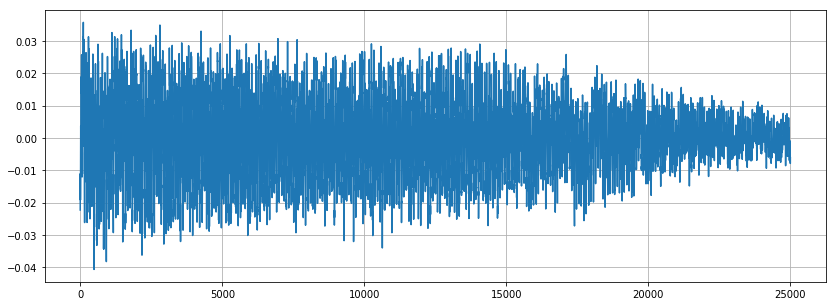

In [33]:
n0 = 70000
n1 = 95000
plt.figure(figsize=(14, 5))
plt.plot(chopin2[n0:n1])
plt.grid()

In [34]:
zero_crossings = librosa.zero_crossings(chopin[n0:n1], pad=False)
print(sum(zero_crossings))

1020


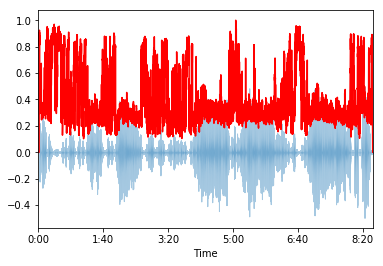

In [36]:
spectral_rolloff = librosa.feature.spectral_rolloff(chopin+0.01, sr=sr2)[0]
librosa.display.waveplot(chopin, sr=sr2, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

(20, 22244)


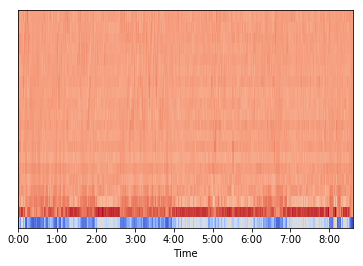

In [39]:
mfccs = librosa.feature.mfcc(chopin, sr=sr2)
print (mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr2, x_axis='time')

[ -2.90239171e-15  -1.48577428e-14  -8.50652742e-16   9.08142869e-16
  -1.55459174e-15   1.21324457e-15  -9.83668381e-16  -2.12970763e-16
   1.00420182e-15  -1.05699281e-15  -3.76880888e-15  -1.63372582e-15
   2.91640675e-16  -2.29966748e-16   4.21234907e-15   5.10191501e-17
   7.96878498e-16  -1.69709049e-16   9.09343231e-16   2.31927007e-16]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.]


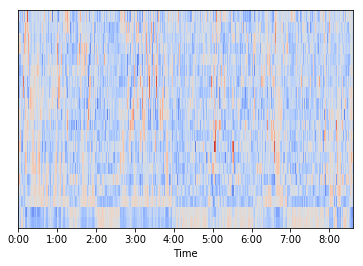

In [40]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

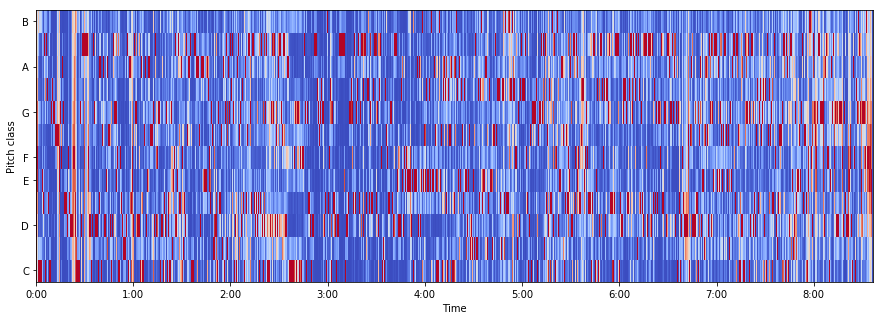

In [41]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(chopin, sr=sr2, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

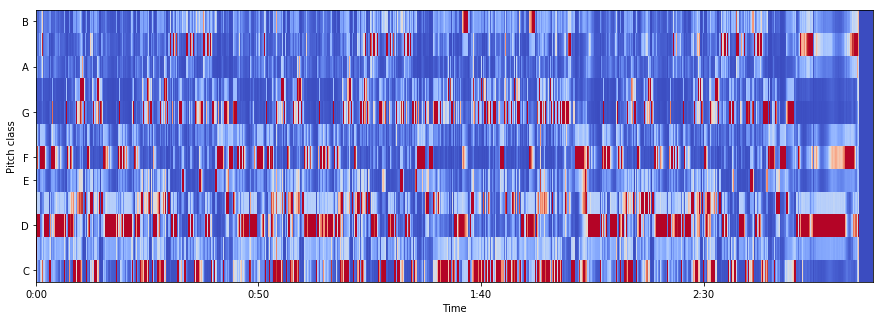

In [42]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')